In [69]:
import numpy as np
import pandas as pd

In [70]:
train = pd.read_csv("./input/train.csv", parse_dates = ["datetime"])
test = pd.read_csv("./input/test.csv", parse_dates = ["datetime"])

In [71]:
train["datetime"] = train["datetime"].astype("datetime64")
train["datetime"] = pd.to_datetime(train["datetime"])

train["year"] = train["datetime"].dt.year
train["hour"] = train["datetime"].dt.hour
train["dayofweek"] = train["datetime"].dt.dayofweek

test["year"] = test["datetime"].dt.year
test["hour"] = test["datetime"].dt.hour
test["dayofweek"] = test["datetime"].dt.dayofweek
train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,hour,dayofweek
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,2011,0,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,2011,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2011,2,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,2011,3,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,2011,4,5


<AxesSubplot:xlabel='datetime'>

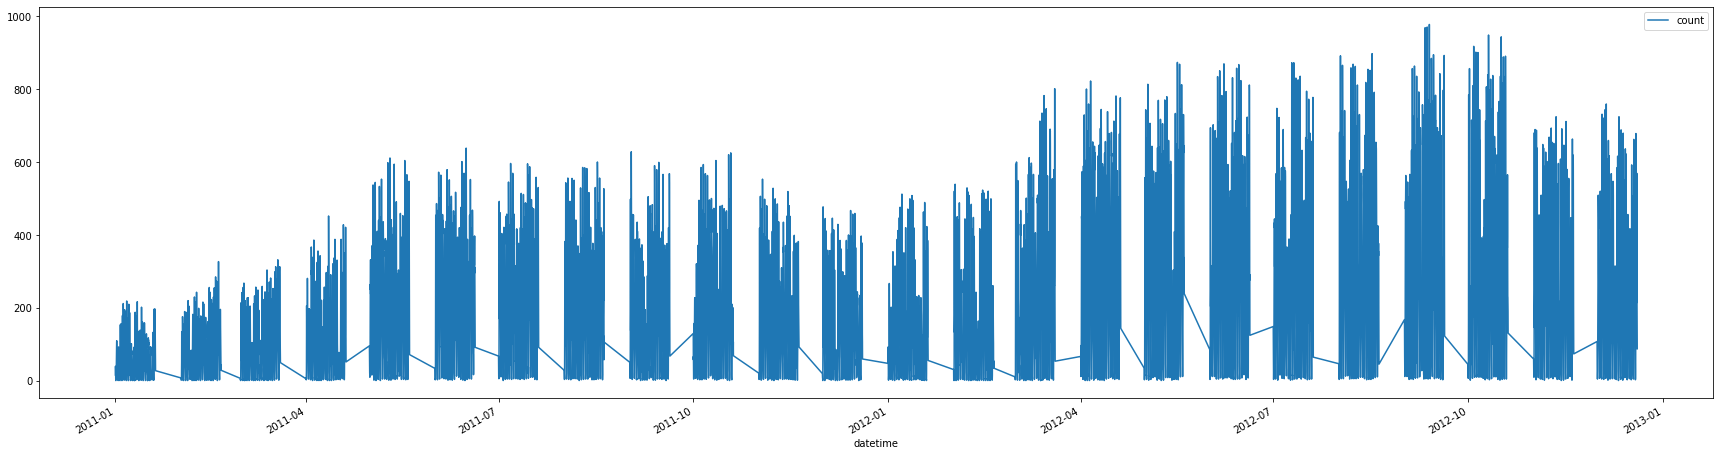

In [72]:
train.plot(x='datetime', y='count', figsize=(30, 8))

In [73]:
y_train = train["count"]

In [74]:
test.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [75]:
train = train.drop(["datetime", "casual", "registered", "count"], 1)
test.drop(["datetime"], 1, inplace=True)

/var/folders/j4/w32h9vpj1234y3r6pb4mz5pm0000gn/T/ipykernel_21356/2301185981.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  train = train.drop(["datetime", "casual", "registered", "count"], 1)
/var/folders/j4/w32h9vpj1234y3r6pb4mz5pm0000gn/T/ipykernel_21356/2301185981.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  test.drop(["datetime"], 1, inplace=True)


In [76]:
train.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,1,0,0,1,9.84,14.395,81,0.0,2011,0,5
1,1,0,0,1,9.02,13.635,80,0.0,2011,1,5
2,1,0,0,1,9.02,13.635,80,0.0,2011,2,5
3,1,0,0,1,9.84,14.395,75,0.0,2011,3,5
4,1,0,0,1,9.84,14.395,75,0.0,2011,4,5


In [77]:
test.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek
0,1,0,1,1,10.66,11.365,56,26.0027,2011,0,3
1,1,0,1,1,10.66,13.635,56,0.0000,2011,1,3
2,1,0,1,1,10.66,13.635,56,0.0000,2011,2,3
3,1,0,1,1,10.66,12.880,56,11.0014,2011,3,3
4,1,0,1,1,10.66,12.880,56,11.0014,2011,4,3


In [78]:
y_train = np.log1p(y_train)


In [79]:
from sklearn.ensemble import RandomForestRegressor

In [80]:
rf = RandomForestRegressor(n_estimators=100)
rf.fit(train, y_train)

RandomForestRegressor()

In [81]:
preds = rf.predict(test)

In [82]:
submission=pd.read_csv("./input/sampleSubmission.csv")

In [83]:
submission["count"] = np.expm1(preds)

<AxesSubplot:xlabel='datetime'>

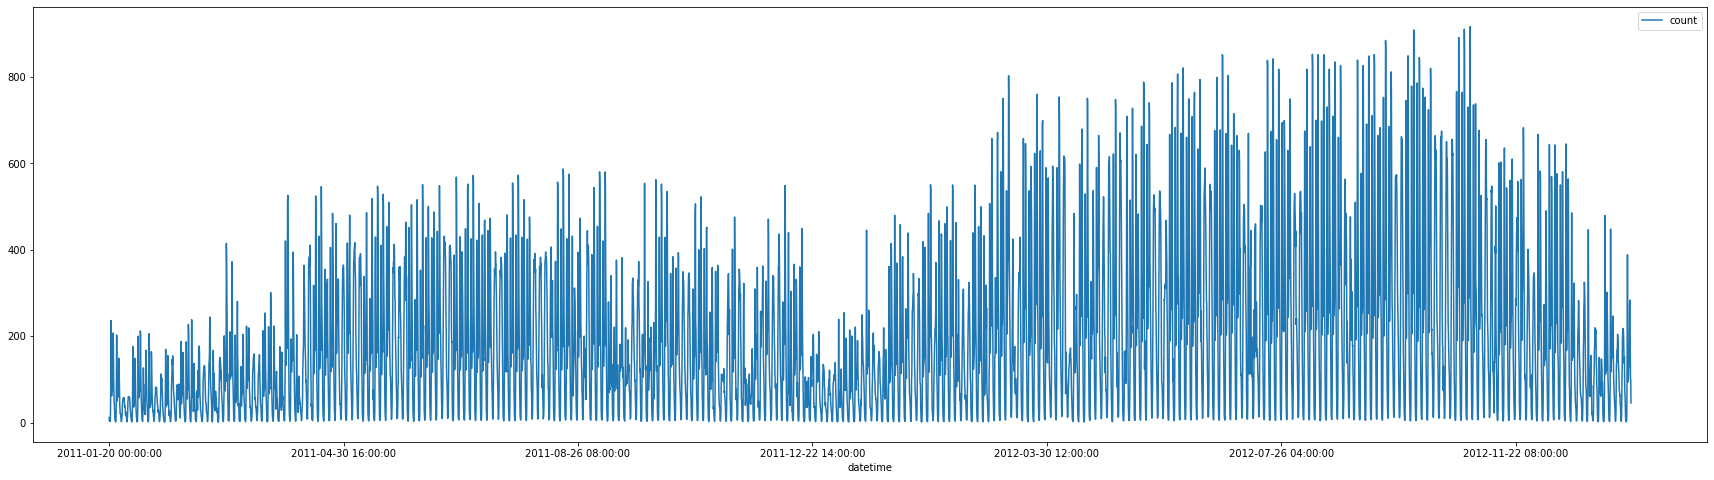

In [84]:
submission.plot(x='datetime', y='count', figsize=(30, 8))

In [85]:
submission.to_csv("result.csv", index=False)